<img src="resources/qgss-header-inv.png" alt="Drawing" style="width: 600px;"/>
<img src="resources/qubit-drive.png" alt="Drawing" style="width: 600px;"/>


### by nick brønn

### Treat the transmon as a qubit for simplicity

Then we can describe the dynamics of the qubit with the **Pauli Matrices**:

$$
\sigma^x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \qquad
\sigma^y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \qquad
\sigma^z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \qquad
$$

They obey the commutator relations

$$ [\sigma^x, \sigma^y] = 2i\sigma^z \qquad [\sigma^y, \sigma^z] = 2i\sigma^x \qquad [\sigma^z, \sigma^x] = 2i\sigma^y $$

On its own, the qubit Hamiltonian is

$$ \hat{H}_q = -\frac{1}{2} \hbar \omega_q \sigma^z $$

Ground state of the qubit ($|0\rangle$): points in the $+\hat{z}$ direction of the Bloch sphere <br>
Excited state of the qubit ($|1\rangle$): points in the $-\hat{z}$ direction of the Bloch sphere

In [33]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

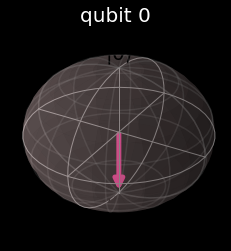

In [35]:
excited = Statevector.from_int(1, 2)
plot_bloch_multivector(excited.data) 

The Pauli matrices also let us define raising and lowering operators

$$ \sigma^+ = \frac{1}{2}( \sigma^x - i\sigma^y) \qquad {\rm and} 
\qquad \sigma^- = \frac{1}{2}( \sigma^x + i\sigma^y)$$

They raise and lower qubit states

$$ \sigma^+ |0\rangle = |1\rangle \qquad \sigma^+ |1\rangle = 0
\qquad {\rm and} \qquad 
\sigma^-|1\rangle = |0\rangle \qquad \sigma^-|0\rangle = 0$$

## Electric Dipole Interaction

The **qubit** behaves as an electric dipole

$$\vec{d} = \vec{d}_0 \sigma^+ + \vec{d}_0^* \sigma^-$$

The **drive** behaves as an electric field

$$\vec{E} = \vec{E}_0 e^{-i\omega_d t} + \vec{E}_0^* e^{i\omega_d t}$$

The drive Hamiltonian is then

$$ \hat{H}_d = -\vec{d} \cdot \vec{E} $$

And now, some math...
$$\hat{H}_d = -\left(\vec{d}_0 \sigma^+ + \vec{d}_0^* \sigma^-\right) \cdot \left(\vec{E}_0 e^{-i\omega_d t} + \vec{E}_0^* e^{i\omega_d t}\right) \\
= -\left(\vec{d}_0 \cdot \vec{E}_0 e^{-i\omega_d t} + \vec{d}_0 \cdot \vec{E}_0^* e^{i\omega_d t}\right)\sigma^+
-\left(\vec{d}_0^* \cdot \vec{E}_0 e^{-i\omega_d t} + \vec{d}_0^* \cdot \vec{E}_0^* e^{i\omega_d t}\right)\sigma^- $$

$$
\equiv -\hbar\left(\Omega e^{-i\omega_d t} + \tilde{\Omega} e^{i\omega_d t}\right)\sigma^+
-\hbar\left(\tilde{\Omega}^* e^{-i\omega_d t} + \Omega^* e^{i\omega_d t}\right)\sigma^-
$$

by setting $\Omega \equiv \vec{d}_0 \cdot \vec{E}_0/\hbar$ and $\tilde{\Omega} \equiv \vec{d}_0 \cdot \vec{E}_0^*/\hbar $

## Rotating Wave Approximation

Move the Hamiltonian to the interaction picture 

$$\hat{H}_{d,I} = U\hat{H}_dU^\dagger \qquad \qquad ^*{\rm omitting\, terms\, that\, cancel} $$

with 
$$
U = e^{i\hat{H}_q t/\hbar} = e^{-i\omega_q t \sigma^z/2} = I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)
$$

Calculate the operator terms 

$$
\left(I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)\right) \sigma^+ \left(I\cos(\omega_q t/2) + i\sigma^z\sin(\omega_q t/2)\right) = e^{i\omega_q t} \sigma^+ \\
\left(I\cos(\omega_q t/2) - i\sigma^z\sin(\omega_q t/2)\right) \sigma^- \left(I\cos(\omega_q t/2) + i\sigma^z\sin(\omega_q t/2)\right) = e^{-i\omega_q t} \sigma^-
$$

The transformed Hamiltonian is

$$
\hat{H}_{d,I} = -\hbar\left(\Omega e^{-i(\omega_q-\omega_d) t} + \tilde{\Omega} e^{i(\omega_q+\omega_d) t}\right) \sigma^+ -\hbar\left(\tilde{\Omega}^* e^{-i(\omega_q+\omega_d) t} + \Omega^* e^{i(\omega_q-\omega_d) t}\right) \sigma^-
$$

## Rotating Wave Approximation

$$
\hat{H}_{d,I} = -\hbar\left(\Omega e^{-i(\omega_q-\omega_d) t} + \tilde{\Omega} e^{i(\omega_q+\omega_d) t}\right) \sigma^+ -\hbar\left(\tilde{\Omega}^* e^{-i(\omega_q+\omega_d) t} + \Omega^* e^{i(\omega_q-\omega_d) t}\right) \sigma^-
$$

$\omega_q-\omega_d$: slow-rotating terms contribute most of interaction <br>
$\omega_q+\omega_d$: fast-rotating terms tend to average out

Define $\Delta_q = \omega_q - \omega_d$ and make the RWA
$$
\hat{H}_{d,I}^{\rm (RWA)} =-\hbar\Omega e^{-i\Delta_q t}  \sigma^+ -\hbar \Omega^* e^{i\Delta_q t} \sigma^-
$$

Transform Hamiltonian back to the Schrödinger picture
$$
\hat{H}_{d}^{\rm (RWA)} = -\hbar\Omega e^{-i\omega_d t} \sigma^+ -\hbar\Omega^* e^{i\omega_d t} \sigma^-
$$

And the total qubit Hamiltonian is

$$ \hat{H}_{\rm tot} = \hat{H}_q + \hat{H}_d^{\rm (RWA)} = -\frac{1}{2} \hbar\omega_q \sigma^z -\hbar\Omega e^{-i\omega_d t} \sigma^+ -\hbar\Omega^* e^{i\omega_d t} \sigma^- $$

## Qubit Drive Example

Set $\Omega^* \equiv \Omega$ and transform into the frame of the drive

$$
\hat{H}_{\rm eff} = U_d \hat{H}_{\rm tot} U_d^\dagger - i\hbar U_d \dot{U_d}^\dagger
$$
with $U_d = \exp\{-i\omega_d t\sigma^z/2\}$


In a similar calculation to earlier, the effective Hamiltonian is

$$
\hat{H}_{\rm eff} = -\frac{1}{2}\hbar \Delta_q \sigma^z -\hbar\Omega \sigma^x
$$

### What this means

On-resonance ($\Delta_q = 0$): the drive rotates the qubit around the $\hat{x}$-axis <br>
Off-resonance ($\Delta_q \ne 0$): an additional $\hat{z}$-rotation on top of drive

## Qiskit Pulse: On-resonant Drive (Rabi)
$$
\hat{H}_{\rm eff} = -\hbar\Omega \sigma^x
$$

### Import Necessary Libraries

In [1]:
from qiskit.tools.jupyter import *
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

### Verify Backend is Pulse-enabled

In [2]:
backend_config = backend.configuration()
assert backend_config.open_pulse, "Backend doesn't support Pulse"

## Qiskit Pulse: On-resonant Drive (Rabi)

### Take care of some other things

In [3]:
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns") 

backend_defaults = backend.defaults()

Sampling time: 0.2222222222222222 ns


## Qiskit Pulse: On-resonant Drive (Rabi)

In [4]:
import numpy as np

# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

# We will find the qubit frequency for the following qubit.
qubit = 0
# The Rabi sweep will be at the given qubit frequency.
center_frequency_Hz = backend_defaults.qubit_freq_est[qubit]        # The default frequency is given in Hz
                                                                    # warning: this will change in a future release
print(f"Qubit {qubit} has an estimated frequency of {center_frequency_Hz / GHz} GHz.")

Qubit 0 has an estimated frequency of 4.974450108756385 GHz.


## Qiskit Pulse: On-resonant Drive (Rabi)

In [5]:
from qiskit import pulse, assemble            # This is where we access all of our Pulse features!
from qiskit.pulse import Play
from qiskit.pulse import pulse_lib    # This Pulse module helps us build sampled pulses for common pulse shapes

### Collect the necessary channels
drive_chan = pulse.DriveChannel(qubit)
meas_chan = pulse.MeasureChannel(qubit)
acq_chan = pulse.AcquireChannel(qubit)

inst_sched_map = backend_defaults.instruction_schedule_map
measure = inst_sched_map.get('measure', qubits=[0])

## Qiskit Pulse: On-resonant Drive (Rabi)

In [6]:
# Rabi experiment parameters
# Drive amplitude values to iterate over: 50 amplitudes evenly spaced from 0 to 0.75
num_rabi_points = 50
drive_amp_min = 0
drive_amp_max = 0.75
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

# drive waveforms mush be in units of 16
drive_sigma = 80 # in dt
drive_samples = 8*drive_sigma # in dt

## Qiskit Pulse: On-resonant Drive (Rabi)

In [7]:
# Build the Rabi experiments:
#    A drive pulse at the qubit frequency, followed by a measurement,
#    where we vary the drive amplitude each time.
rabi_schedules = []
for drive_amp in drive_amps:
    rabi_pulse = pulse_lib.gaussian(duration=drive_samples, amp=drive_amp, 
                                    sigma=drive_sigma, name=f"Rabi drive amplitude = {drive_amp}")
    this_schedule = pulse.Schedule(name=f"Rabi drive amplitude = {drive_amp}")
    this_schedule += Play(rabi_pulse, drive_chan)
    
    # The left shift `<<` is special syntax meaning to shift the start time of the schedule by some duration
    this_schedule += measure << this_schedule.duration
    rabi_schedules.append(this_schedule)

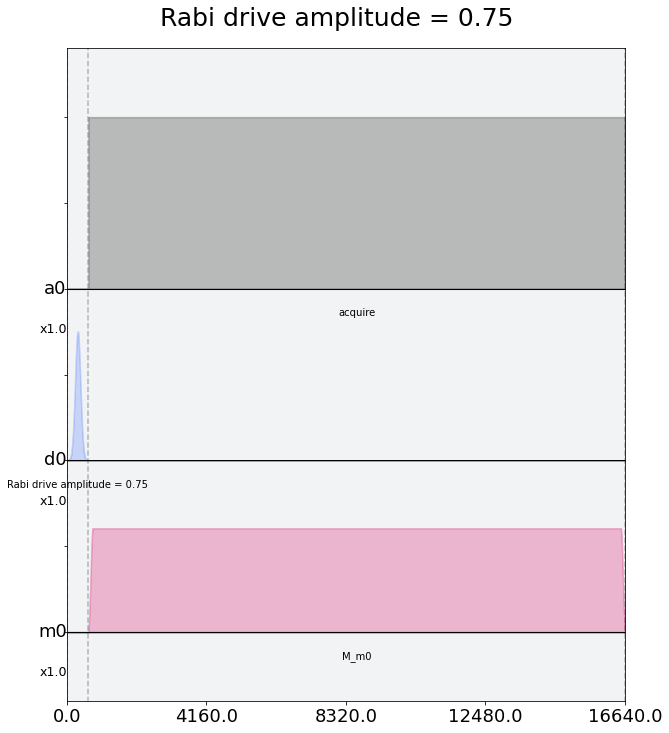

In [8]:
rabi_schedules[-1].draw(label=True, scaling=1.0) 

## Qiskit Pulse: On-resonant Drive (Rabi)

In [9]:
# assemble the schedules into a Qobj
num_shots_per_point = 1024

rabi_experiment_program = assemble(rabi_schedules,
                                   backend=backend,
                                   meas_level=1,
                                   meas_return='avg',
                                   shots=num_shots_per_point,
                                   schedule_los=[{drive_chan: center_frequency_Hz}]
                                                * num_rabi_points)

In [10]:
# RUN the job on a real device
#job = backend.run(rabi_experiment_program)
#print(job.job_id())
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)

# OR retreive result from previous run
job = backend.retrieve_job("5ef3bf17dc3044001186c011")

IBMQBackendApiError: "Failed to get job 5ef3bf17dc3044001186c011: '404 Client Error: Not Found for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/5ef3bf17dc3044001186c011. Job not found., Error code: 3250.'"

## Qiskit Pulse: On-resonant Drive (Rabi)

In [41]:
rabi_results = job.result()

In [42]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

scale_factor = 1e-14

# center data around 0
def baseline_remove(values):
    return np.array(values) - np.mean(values)

## Qiskit Pulse: On-resonant Drive (Rabi)

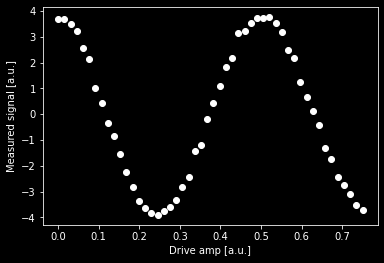

In [43]:
rabi_values = []
for i in range(num_rabi_points):
    # Get the results for `qubit` from the ith experiment
    rabi_values.append(rabi_results.get_memory(i)[qubit]*scale_factor)

rabi_values = np.real(baseline_remove(rabi_values))

plt.xlabel("Drive amp [a.u.]")
plt.ylabel("Measured signal [a.u.]")
plt.scatter(drive_amps, rabi_values, color='white') # plot real part of Rabi values
plt.show()

## Qiskit Pulse: On-resonant Drive (Rabi)
### Define Rabi curve-fitting function

In [44]:
from scipy.optimize import curve_fit

def fit_function(x_values, y_values, function, init_params):
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    
    return fitparams, y_fit

In [45]:
fit_params, y_fit = fit_function(drive_amps,
                                 rabi_values, 
                                 lambda x, A, B, drive_period, phi: (A*np.cos(2*np.pi*x/drive_period - phi) + B),
                                 [10, 0.1, 0.6, 0])

## Qiskit Pulse: On-resonant Drive (Rabi)

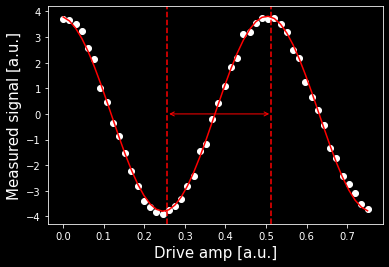

In [46]:
plt.scatter(drive_amps, rabi_values, color='white')
plt.plot(drive_amps, y_fit, color='red')

drive_period = fit_params[2] # get period of rabi oscillation

plt.axvline(drive_period/2, color='red', linestyle='--')
plt.axvline(drive_period, color='red', linestyle='--')
plt.annotate("", xy=(drive_period, 0), xytext=(drive_period/2,0), arrowprops=dict(arrowstyle="<->", color='red'))

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.show()

## Save $\pi/2$ pulse for later

In [47]:
pi_amp = abs(drive_period / 2)
print(f"Pi Amplitude = {pi_amp}")

Pi Amplitude = 0.2562919959075409


In [48]:
# Drive parameters
# The drive amplitude for pi/2 is simply half the amplitude of the pi pulse
drive_amp = pi_amp / 2
# x_90 is a concise way to say pi_over_2; i.e., an X rotation of 90 degrees
x90_pulse = pulse_lib.gaussian(duration=drive_samples,
                               amp=drive_amp, 
                               sigma=drive_sigma,
                               name='x90_pulse')

## Qiskit Pulse: Off-resonant Drive (Ramsey)
$$
\hat{H}_{\rm eff} = -\frac{1}{2}\hbar \Delta_q \sigma^z -\hbar\Omega \sigma^x
$$

In [29]:
# Ramsey experiment parameters
time_max_us = 1.8
time_step_us = 0.025
times_us = np.arange(0.1, time_max_us, time_step_us)
# Convert to units of dt
delay_times_dt = times_us * us / dt

In [30]:
# create schedules for Ramsey experiment 
ramsey_schedules = []

for delay in delay_times_dt:
    this_schedule = pulse.Schedule(name=f"Ramsey delay = {delay * dt / us} us")
    this_schedule += Play(x90_pulse, drive_chan)
    this_schedule += Play(x90_pulse, drive_chan) << this_schedule.duration + int(delay)
    this_schedule += measure << this_schedule.duration

    ramsey_schedules.append(this_schedule)

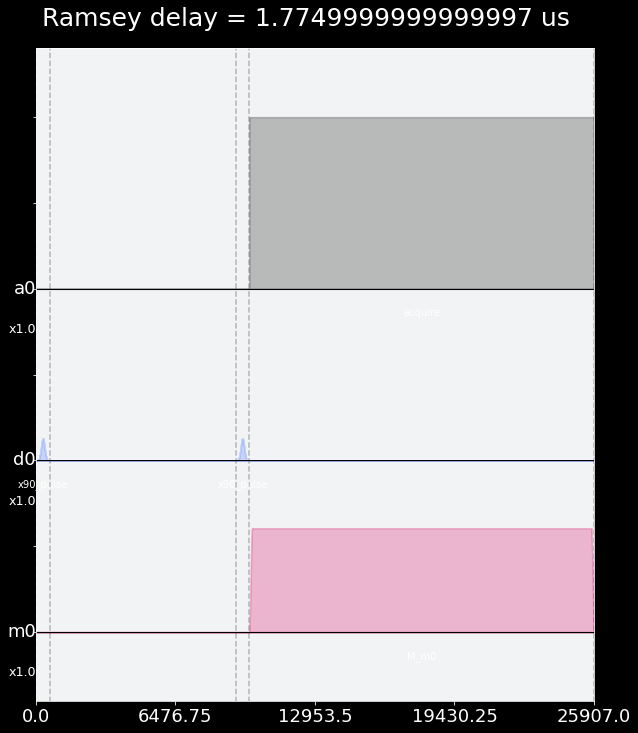

In [31]:
ramsey_schedules[-1].draw(label=True, scaling=1.0)

## Qiskit Pulse: Off-resonant Drive (Ramsey)

In [50]:
# Execution settings
num_shots = 256

detuning_MHz = 2 
ramsey_frequency = round(center_frequency_Hz + detuning_MHz * MHz, 6) # need ramsey freq in Hz
ramsey_program = assemble(ramsey_schedules,
                             backend=backend,
                             meas_level=1,
                             meas_return='avg',
                             shots=num_shots,
                             schedule_los=[{drive_chan: ramsey_frequency}]*len(ramsey_schedules)
                            )

In [49]:
# RUN the job on a real device
#job = backend.run(ramsey_experiment_program)
#print(job.job_id())
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)

# OR retreive job from previous run
job = backend.retrieve_job('5ef3ed3a84b1b70012374317')

## Qiskit Pulse: Off-resonant Drive (Ramsey)
### Ramsey curve-fitting function

In [51]:
ramsey_results = job.result()
ramsey_values = []
for i in range(len(times_us)):
    ramsey_values.append(ramsey_results.get_memory(i)[qubit]*scale_factor)

In [52]:
fit_params, y_fit = fit_function(times_us, np.real(ramsey_values),
                                 lambda x, A, del_f_MHz, C, B: (
                                          A * np.cos(2*np.pi*del_f_MHz*x - C) + B
                                         ),
                                 [5, 1./0.4, 0, 0.25]
                                )

## Qiskit Pulse: Off-resonant Drive (Ramsey)

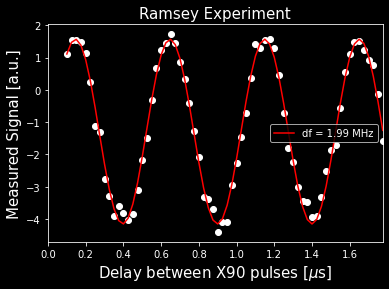

In [53]:
# Off-resonance component
_, del_f_MHz, _, _, = fit_params # freq is MHz since times in us

plt.scatter(times_us, np.real(ramsey_values), color='white')
plt.plot(times_us, y_fit, color='red', label=f"df = {del_f_MHz:.2f} MHz")
plt.xlim(0, np.max(times_us))
plt.xlabel('Delay between X90 pulses [$\mu$s]', fontsize=15)
plt.ylabel('Measured Signal [a.u.]', fontsize=15)
plt.title('Ramsey Experiment', fontsize=15)
plt.legend()
plt.show()

# <center> On to Exercise 1... </center>